In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn
import splinelib as tsp

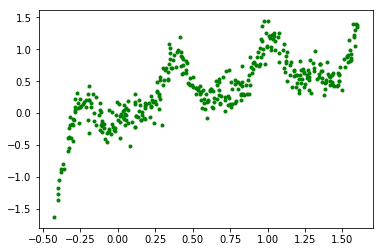

In [2]:
x = np.linspace(0,2,400)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y = (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.05, x.shape)*3
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

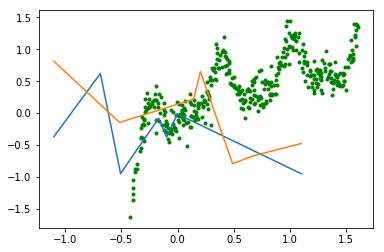

In [8]:
max_points = 7
lr=0.1
spline = tsp.SplineMatrixLayer(1, 2, max_points=max_points)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
for spline_ in spline.spline_mat:
    for spline__ in spline_:
        plt.plot(spline__.X, spline__.Y)

_______________________
Steps 0
Error 0.17239414163699668


_______________________
Steps 10
Error 0.13337932052026122


_______________________
Steps 20
Error 0.12004062801685605


_______________________
Steps 30
Error 0.11122153782133445


_______________________
Steps 40
Error 0.10335990359722949


_______________________
Steps 50
Error 0.10276149686838462


_______________________
Steps 60
Error 0.10135548577757673


_______________________
Steps 70
Error 0.10200270196548412


_______________________
Steps 80
Error 0.09924694548628389


_______________________
Steps 90
Error 0.09990380817762849


_______________________
Steps 100
Error 0.09730468879300597


_______________________
Steps 110
Error 0.09825189943796353


_______________________
Steps 120
Error 0.0952183174568357


_______________________
Steps 130
Error 0.09401040294654706


_______________________
Steps 140
Error 0.09513608919126558


_______________________
Steps 150
Error 0.09414359005194577


____________________

_______________________
Steps 1320
Error 0.02936573486329095


_______________________
Steps 1330
Error 0.029358136174773355


_______________________
Steps 1340
Error 0.029350688911162513


_______________________
Steps 1350
Error 0.02934336806575913


_______________________
Steps 1360
Error 0.029336119672191553


_______________________
Steps 1370
Error 0.029328974083686767


_______________________
Steps 1380
Error 0.02932190866764615


_______________________
Steps 1390
Error 0.029314983917456933


_______________________
Steps 1400
Error 0.029308104171170964


_______________________
Steps 1410
Error 0.02930133593223553


_______________________
Steps 1420
Error 0.029294658367289363


_______________________
Steps 1430
Error 0.02928803718566566


_______________________
Steps 1440
Error 0.029281521851781563


_______________________
Steps 1450
Error 0.029275052221083005


_______________________
Steps 1460
Error 0.02926866433807274


_______________________
Steps 1470
Error 0.029



_______________________
Steps 2620
Error 0.028718515574803902


_______________________
Steps 2630
Error 0.028715848240613937


_______________________
Steps 2640
Error 0.028713149216943235


_______________________
Steps 2650
Error 0.028710601027023098


_______________________
Steps 2660
Error 0.028707936615725727


_______________________
Steps 2670
Error 0.028705335695834996


_______________________
Steps 2680
Error 0.02870283948275501


_______________________
Steps 2690
Error 0.02870029057237324


_______________________
Steps 2700
Error 0.028697863728691823


_______________________
Steps 2710
Error 0.028695434953291663


_______________________
Steps 2720
Error 0.02869305210676773


_______________________
Steps 2730
Error 0.028690685504062466


_______________________
Steps 2740
Error 0.02868834955750239


_______________________
Steps 2750
Error 0.028686038921754503


_______________________
Steps 2760
Error 0.028683745955328077


_______________________
Steps 2770
Error 0

TclError: invalid command name "pyimage62"

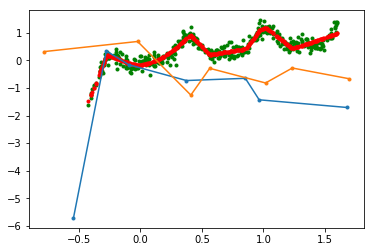

In [9]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):

    a1 = spline.forward(xx)
    a10, a11 = a1[:, :1], a1[:, 1:]
    yout = a10 *a11
    dy = yout-yy
    
    da1 = np.hstack([dy*a11, dy*a10])
    dx = spline.backward(da1)
    spline.update(lr)
    
    if step % 100 == 0:
        spline._maintain_good_spline_()
        
    if step % 10 == 0:            
        error = (dy**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.scatter(x, yout.reshape(-1), marker='.', color='r')
        for spline_ in spline.spline_mat:
            for spline__ in spline_:
                plt.plot(spline__.X, spline__.Y, marker='.')
                
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

In [10]:
# spline.n_max +=1

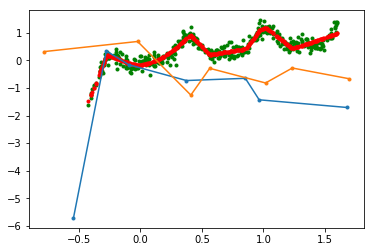

In [11]:
%matplotlib inline

plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), marker='.', color='r')
for spline_ in spline.spline_mat:
    for spline__ in spline_:
        plt.plot(spline__.X, spline__.Y, marker='.')